In [1]:
pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\crie072\anaconda3\lib\site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import csv
import xlrd
import io
from zipfile import ZipFile
from datetime import date, timedelta, time, datetime

import glob

import argparse
import logging
import os

from pathlib import Path

from pandasql import sqldf

In [3]:
today_yyyymmdd = date.today().strftime("%Y%m%d")
print(today_yyyymmdd)

20200827


In [4]:
#pandasの表示列数を増やす
import pandas as pd
pd.set_option('display.max_columns', 100)

ディレクトリ

In [5]:
data_dir = Path(r"C:\Users\crie072\Documents\01_データ関連\Adhoc\202008_消費者還元")

インプット ※経営管理からのリストデータを取込

In [6]:
path = r"C:\Users\crie072\Documents\01_データ関連\Adhoc\202008_消費者還元" # use your path
all_files = glob.glob(path + "/*.csv")

li = []
 
for filename in all_files:
    df = pd.read_csv(filename, usecols=['売上年月日','決済金額','屋号（漢字）','還元率','PAN'],encoding="cp932",
                    dtype={'PAN':str})
    li.append(df)
df_all = pd.concat(li, axis=0, ignore_index=True)
df_all

,PAN,売上年月日,決済金額,屋号（漢字）,還元率
0,4980121001365006,191007,1628,ダイコクドラッグ狸小路４丁目店,5
1,4980121001365006,191029,10527,モッズ ヘア 西宮店,2
2,4980121001712017,191016,12760,鉄板焼れすとらん中はら,5
3,4980121002072106,191005,21967,牛もつどて鍋 まつい亭,5
4,4980121002401016,191008,3853,マルヤス吹田新芦屋店,5
...,...,...,...,...,...
3851474,4980671573746017,191228,122720,ａｕ ＫＹＯＴＯ,2
3851475,5279253279334005,191228,12650,ＡＳＡＮＴＥＮＩ,5
3851476,4980671574154005,191229,30600,ホテルはちまん,5
3851477,4980671574154005,191229,77319,レストラン ティファニー,5


アウトプット

In [7]:
result = "no_of_use_months"
result2 = "shoplist_ranking_by_trn"
list_all = "統合リスト"

In [8]:
df_all = df_all.rename(columns={'売上年月日':'shopping_dt','決済金額':'shopping_amt','屋号（漢字）':'shop_name','還元率':'cb_rate'})
df_all.head(1)

,PAN,shopping_dt,shopping_amt,shop_name,cb_rate
0,4980121001365006,191007,1628,ダイコクドラッグ狸小路４丁目店,5


In [9]:
#日付データの変換
df_all['shopping_dt']=df_all['shopping_dt'] + 20000000
df_all['shopping_dt']=pd.to_datetime(df_all['shopping_dt'], format='%Y%m%d')


df_all['shopping_year'] = df_all['shopping_dt'].dt.year
df_all['shopping_month'] = df_all['shopping_dt'].dt.month
df_all['shopping_day'] = df_all['shopping_dt'].dt.day

df_all['shopping_yymm'] = df_all[['shopping_year','shopping_month']].apply(lambda x:'{}年{}月'.format(x[0],x[1]),axis=1)
df_all

,PAN,shopping_dt,shopping_amt,shop_name,cb_rate,shopping_year,shopping_month,shopping_day,shopping_yymm
0,4980121001365006,2019-10-07,1628,ダイコクドラッグ狸小路４丁目店,5,2019,10,7,2019年10月
1,4980121001365006,2019-10-29,10527,モッズ ヘア 西宮店,2,2019,10,29,2019年10月
2,4980121001712017,2019-10-16,12760,鉄板焼れすとらん中はら,5,2019,10,16,2019年10月
3,4980121002072106,2019-10-05,21967,牛もつどて鍋 まつい亭,5,2019,10,5,2019年10月
4,4980121002401016,2019-10-08,3853,マルヤス吹田新芦屋店,5,2019,10,8,2019年10月
...,...,...,...,...,...,...,...,...,...
3851474,4980671573746017,2019-12-28,122720,ａｕ ＫＹＯＴＯ,2,2019,12,28,2019年12月
3851475,5279253279334005,2019-12-28,12650,ＡＳＡＮＴＥＮＩ,5,2019,12,28,2019年12月
3851476,4980671574154005,2019-12-29,30600,ホテルはちまん,5,2019,12,29,2019年12月
3851477,4980671574154005,2019-12-29,77319,レストラン ティファニー,5,2019,12,29,2019年12月


In [10]:
print(df_all.shape)
print(df_all.index)
print(df_all.columns)
print(df_all.dtypes)

(3851479, 9)
RangeIndex(start=0, stop=3851479, step=1)
Index(['PAN', 'shopping_dt', 'shopping_amt', 'shop_name', 'cb_rate',
       'shopping_year', 'shopping_month', 'shopping_day', 'shopping_yymm'],
      dtype='object')
PAN                       object
shopping_dt       datetime64[ns]
shopping_amt               int64
shop_name                 object
cb_rate                    int64
shopping_year              int64
shopping_month             int64
shopping_day               int64
shopping_yymm             object
dtype: object


In [22]:
#CSVアウトプット
df_all.to_csv(data_dir /f"output"/f'{list_all}.csv', header=True ,index=None, encoding='utf-8-sig')

In [11]:
#月次売上金額(百万円単位)
df_all.groupby(['shopping_yymm'])['shopping_amt'].sum()/1000000

shopping_yymm
2019年10月    2375.837522
2019年11月    4232.068411
2019年12月    4215.761293
2020年1月     3686.593457
2020年2月     3601.217547
2020年3月     3923.259769
2020年4月     2930.462557
2020年5月     3322.258499
2020年6月     3794.666907
Name: shopping_amt, dtype: float64

C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\crie072\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0, flags=flags)


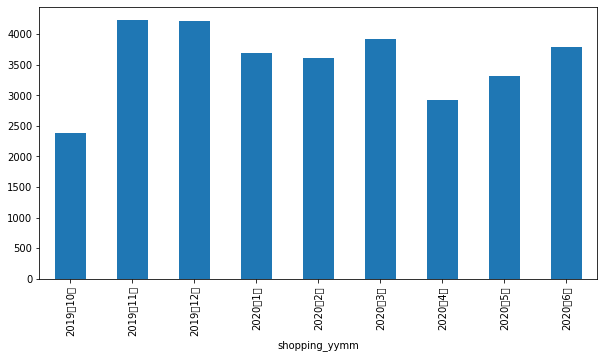

In [12]:
df_tmp = df_all.groupby(['shopping_yymm'])['shopping_amt'].sum()/1000000
df_tmp.plot.bar(x = 'shopping_yymm',y = 'shopping_amt', figsize = (10, 5))

In [13]:
#月次取引数
df_all.groupby(['shopping_yymm'])['PAN'].count()

shopping_yymm
2019年10月    309386
2019年11月    489950
2019年12月    430847
2020年1月     392383
2020年2月     421597
2020年3月     471553
2020年4月     430959
2020年5月     463780
2020年6月     441024
Name: PAN, dtype: int64

In [17]:
#月次ユニーク取引客数
df_all.groupby(['shopping_yymm'])['PAN'].nunique()

shopping_yymm
2019年10月    129961
2019年11月    193878
2019年12月    156689
2020年1月     147961
2020年2月     150070
2020年3月     154134
2020年4月     138403
2020年5月     148746
2020年6月     148584
Name: PAN, dtype: int64

In [26]:
#このあとやること
#加盟店別取引件数（金額）Top30
#会員別期間内取引月数

In [27]:
print(df_all.dtypes)

PAN                       object
shopping_dt       datetime64[ns]
shopping_amt               int64
shop_name                 object
cb_rate                    int64
shopping_year              int64
shopping_month             int64
shopping_day               int64
shopping_yymm             object
dtype: object


In [28]:
#会員ごとの月別利用回数と金額集計
q = """
        SELECT
        PAN
        ,shopping_yymm
        ,count(PAN) as no_of_trn
        ,sum(shopping_amt) as sum_shopping_amt
        from 
            df_all
        group by
        PAN,shopping_yymm
        """

df_trn = sqldf(q, locals())
df_trn

,PAN,shopping_yymm,no_of_trn,sum_shopping_amt
0,4980006000075010,2019年11月,3,36333
1,4980006000075013,2019年10月,2,20400
2,4980006000075013,2019年11月,3,36333
3,4980006000075013,2019年12月,1,7200
4,4980006000075013,2020年1月,2,48360
...,...,...,...,...
1368421,6900119939001786,2020年6月,18,12475
1368422,6900119939001828,2020年6月,4,5904
1368423,6900119939001851,2020年6月,5,26129
1368424,6900119939002008,2020年6月,1,617


In [29]:
#会員別の利用月数を集計①
q = """
        SELECT
        PAN
        ,shopping_yymm
        ,no_of_trn
        ,count(no_of_trn) over(partition by PAN order by shopping_yymm) as no_of_use_month
        ,sum_shopping_amt
        from 
            df_trn
        group by
        PAN,shopping_yymm
        """

df_trn2 = sqldf(q, locals())
df_trn2

,PAN,shopping_yymm,no_of_trn,no_of_use_month,sum_shopping_amt
0,4980006000075010,2019年11月,3,1,36333
1,4980006000075013,2019年10月,2,1,20400
2,4980006000075013,2019年11月,3,2,36333
3,4980006000075013,2019年12月,1,3,7200
4,4980006000075013,2020年1月,2,4,48360
...,...,...,...,...,...
1368421,6900119939001786,2020年6月,18,1,12475
1368422,6900119939001828,2020年6月,4,1,5904
1368423,6900119939001851,2020年6月,5,1,26129
1368424,6900119939002008,2020年6月,1,1,617


In [30]:
#会員別の利用月数を集計②
q = """
        SELECT
        PAN
        ,sum(no_of_trn) as total_no_trn
        ,max(no_of_use_month) as max_no_use_month
        ,sum(sum_shopping_amt) as total_shopping_amt
        from 
            df_trn2
        group by
        PAN
        """

df_max = sqldf(q, locals())
df_max

,PAN,total_no_trn,max_no_use_month,total_shopping_amt
0,4980006000075010,3,1,36333
1,4980006000075013,12,7,147093
2,4980006000075120,19,8,130930
3,4980006000075120,1,1,1100
4,4980006000075203,5,4,51329
...,...,...,...,...
423506,6900119939001786,18,1,12475
423507,6900119939001828,4,1,5904
423508,6900119939001851,5,1,26129
423509,6900119939002008,1,1,617


In [1]:
#CSVアウトプット　会員別利用月数
df_max.to_csv(data_dir /f"output"/f'{result}.csv', header=True ,index=None, encoding='shift-jis')

NameError: name 'df_max' is not defined

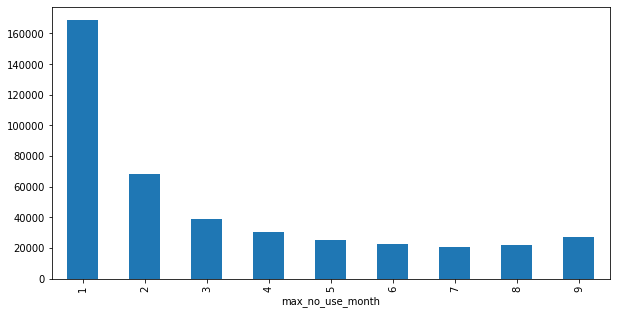

In [32]:
df_tmp = df_max.groupby(['max_no_use_month'])['PAN'].count()
df_tmp.plot.bar(x = 'max_no_use_month',y = 'PAN', figsize = (10, 5))

利用数加盟店Top20

In [33]:
df_all.head(1)

,PAN,shopping_dt,shopping_amt,shop_name,cb_rate,shopping_year,shopping_month,shopping_day,shopping_yymm
0,4980121001365006,2019-10-07,1628,ダイコクドラッグ狸小路４丁目店,5,2019,10,7,2019年10月


In [34]:
q = """
        SELECT
        shop_name
        ,shopping_yymm
        ,count(PAN) as no_of_trn
        ,sum(shopping_amt) as sum_shopping_amt
        from 
            df_all
        group by
        shop_name,shopping_yymm
        """

df_shop = sqldf(q, locals())
df_shop

,shop_name,shopping_yymm,no_of_trn,sum_shopping_amt
0,None,2019年10月,2,93000
1,None,2019年11月,2,137500
2,福島店,2020年2月,1,850
3,福島店,2020年3月,1,1440
4,福島店,2020年5月,1,980
...,...,...,...,...
593680,～ｉｈ,2020年3月,5,174020
593681,～ｉｈ,2020年4月,1,15400
593682,～ｉｈ,2020年5月,3,20680
593683,～ｉｈ,2020年6月,12,311762


In [35]:
q = """
        SELECT
        shopping_yymm
        ,shop_name
        ,no_of_trn
        ,sum_shopping_amt
        ,row_number() over(partition by shopping_yymm order by no_of_trn desc) as rank
        from 
            df_shop
        order by
        shopping_yymm,rank
        """

df_shop2 = sqldf(q, locals())
df_shop2

,shopping_yymm,shop_name,no_of_trn,sum_shopping_amt,rank
0,2019年10月,フィール ネットワーク,5615,19261529,1
1,2019年10月,フレスコ 烏丸店,3518,6355827,2
2,2019年10月,フレスコ 御池店,2822,5286989,3
3,2019年10月,吉池,2690,6666988,4
4,2019年10月,京都八百一本館,2481,6463563,5
...,...,...,...,...,...
593680,2020年6月,ｚａｋｋａ ＯＬＩＶＥ 楽天市場店,1,5775,71083
593681,2020年6月,ｚａｋｋａひぐらし,1,2728,71084
593682,2020年6月,ｚｅａｌ ３ａｉｒ,1,7865,71085
593683,2020年6月,ｚｅａｌ ｄ／ｕ／ｅ,1,12048,71086


In [36]:
q = """
        SELECT*
        from 
            df_shop2
        where 
            rank<=20
        order by
        shopping_yymm,rank
        """

df_shop3 = sqldf(q, locals())
df_shop3

,shopping_yymm,shop_name,no_of_trn,sum_shopping_amt,rank
0,2019年10月,フィール ネットワーク,5615,19261529,1
1,2019年10月,フレスコ 烏丸店,3518,6355827,2
2,2019年10月,フレスコ 御池店,2822,5286989,3
3,2019年10月,吉池,2690,6666988,4
4,2019年10月,京都八百一本館,2481,6463563,5
...,...,...,...,...,...
175,2020年6月,寺内,1230,12658004,16
176,2020年6月,フレスコ 四条店,1189,2350935,17
177,2020年6月,フレスコ 五条西洞院店,1175,2391768,18
178,2020年6月,モリタ屋クオリティフードマーケットＳＵＩＮＡ室町店,1160,2910983,19


In [37]:
#CSVアウトプット　利用件数ベースTop20
df_shop3.to_csv(data_dir /f"output"/f'{result2}.csv', header=True ,index=None, encoding='shift-jis')

SASで売上データをマージ

In [18]:
data_dir = Path(r"C:\Users\crie072\Documents\01_データ関連\Adhoc\202008_消費者還元\SAS")

In [19]:
#インプット
input_file1 = "SUM_SHOPPING_Cashless.csv"
input_file2 = "SUM_ACCO_cashless.csv"

In [20]:
#アウトプット
output_file1 = "キャッシュレス売上月次推移"

In [49]:
df_uri = pd.read_csv(data_dir / f"{input_file1}",encoding='shift-jis',dtype = {'max_no_use_month':str})
df_uri = df_uri.sort_values(['credit_dt'])
df_uri = df_uri[df_uri['credit_dt'] >= 20181001]
df_uri.head()

,credit_dt,year,month,card,brand,cashless_f,meti_code,max_no_use_month,sum_hyakkaten_shoping_amt,sum_gaibu_shoping_amt,sum_hyakkaten_shopping_cnt,sum_gaibu_shopping_cnt,sum_shopping_cnt
97970,20181001,2018,10,一般,Visa,1,0320_美容・病院,6,0,29040,0,6,6
97987,20181001,2018,10,外商,Master,1,0311_百貨店,1,2004328,0,208,0,208
97986,20181001,2018,10,外商,Master,0,3011_通販,NaN,0,3218,0,1,1
97985,20181001,2018,10,外商,Master,0,0316_OCAP他ブランド,NaN,0,6153523,0,802,802
97984,20181001,2018,10,外商,Master,0,0315_海外利用,NaN,0,408789,0,35,35


In [40]:
df_uri['credit_dt']=pd.to_datetime(df_uri['credit_dt'], format='%Y%m%d')
df_uri['credit_dt'] = df_uri['credit_dt'].dt.strftime('%Y/%m/%d')

In [41]:
q = """
        SELECT
        year
        ,month
        ,cashless_f
        ,meti_code
        ,sum(sum_gaibu_shoping_amt) as gaibu_shopping_amt
        ,sum(sum_gaibu_shopping_cnt) as gaibu_shopping_cnt
        from 
            df_uri
        group by 
            1,2,3,4
        """
df_ts = sqldf(q, locals())

In [50]:
df_ts

,year,month,cashless_f,meti_code,gaibu_shopping_amt,gaibu_shopping_cnt
0,2018,10,0,0311_百貨店,501249838,42839
1,2018,10,0,0312_スーパー・コンビニ・小売り,901541925,99113
2,2018,10,0,0313_ホテル・宿泊施設,113228570,3799
3,2018,10,0,0314_飲食店,51599015,6239
4,2018,10,0,0315_海外利用,445594688,34603
...,...,...,...,...,...,...
219,2020,6,1,0314_飲食店,165966057,32447
220,2020,6,1,0315_海外利用,264262784,33378
221,2020,6,1,0316_OCAP他ブランド,9954807138,1484443
222,2020,6,1,0320_美容・病院,193392161,6704


In [24]:
#CSV出力
df_ts.to_csv(data_dir /f"{output_file1}.csv", index=None,header=True,encoding='shift-jis')

デモグラ

In [26]:
df_cust = pd.read_csv(data_dir / f"{input_file2}",encoding='shift-jis',dtype = {'max_no_use_month':str})
df_cust

,cp_dt,year,month,card,brand,age,gender,income,shopping_amt_6month,shopping_amt_12month,cashless_f,max_no_use_month,no_of_account
0,20200630,2020,6,ゴールド,Master,25〜29歳,女性,0円,271,286,0,NaN,1
1,20200630,2020,6,ゴールド,Master,25〜29歳,女性,0円,283,868,1,2,1
2,20200630,2020,6,ゴールド,Master,25〜29歳,女性,0円,889,2618,1,3,1
3,20200630,2020,6,ゴールド,Master,25〜29歳,女性,0円,1034,2301,1,7,1
4,20200630,2020,6,ゴールド,Master,25〜29歳,女性,0円,2103,2103,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804820,20200630,2020,6,外商,Visa,80歳以上,男性,500万円以上〜1，000万円未満,2700,2870,0,NaN,1
804821,20200630,2020,6,外商,Visa,80歳以上,男性,500万円以上〜1，000万円未満,3898,9122,1,8,1
804822,20200630,2020,6,外商,Visa,80歳以上,男性,500万円以上〜1，000万円未満,4557,10978,0,NaN,1
804823,20200630,2020,6,外商,Visa,80歳以上,男性,500万円以上〜1，000万円未満,4659,5152,0,NaN,1


In [27]:
df_cust['cp_dt']=pd.to_datetime(df_cust['cp_dt'], format='%Y%m%d')
df_cust['cp_dt'] = df_cust['cp_dt'].dt.strftime('%Y/%m/%d')

In [28]:
#キャッシュレスを利用した人の性・年齢別
q = """
        SELECT
        cp_dt
        ,card
        ,cashless_f
        ,age
        ,gender
        ,sum(no_of_account) as sum_account
        from 
            df_cust
        group by
            1,2,3,4,5
        """

df_age = sqldf(q, locals())
df_age.head()

,cp_dt,card,cashless_f,age,gender,sum_account
0,2020/06/30,ゴールド,0,25〜29歳,女性,143
1,2020/06/30,ゴールド,0,25〜29歳,男性,108
2,2020/06/30,ゴールド,0,30〜34歳,女性,403
3,2020/06/30,ゴールド,0,30〜34歳,男性,318
4,2020/06/30,ゴールド,0,35〜39歳,女性,562


In [32]:
#CSV出力
df_age.to_csv(data_dir /r"Output"/'cashless_by_age.csv', header=True ,index=None, encoding='shift=jis')

In [33]:
#キャッシュレスを利用した人の性・年齢別2
q = """
        SELECT
        cp_dt
        ,card
        ,age
        ,gender
        ,max_no_use_month
        ,sum(no_of_account) as sum_account
        from 
            df_cust
        where 
            cashless_f = 1
        group by
            1,2,3,4,5
        """

df_age2 = sqldf(q, locals())
df_age2.head()

,cp_dt,card,age,gender,max_no_use_month,sum_account
0,2020/06/30,ゴールド,25〜29歳,女性,1,61
1,2020/06/30,ゴールド,25〜29歳,女性,2,45
2,2020/06/30,ゴールド,25〜29歳,女性,3,51
3,2020/06/30,ゴールド,25〜29歳,女性,4,50
4,2020/06/30,ゴールド,25〜29歳,女性,5,32


In [34]:
#CSV出力
df_age2.to_csv(data_dir /r"Output"/'cashless_by_age2.csv', header=True ,index=None, encoding='shift=jis')

In [ ]:
#キャッシュレスを利用した人の性・年齢別2
q = """
        SELECT
        cp_dt
        ,card
        ,age
        ,gender
        ,max_no_use_month
        ,sum(no_of_account) as sum_account
        from 
            df_cust
        where 
            cashless_f = 1
        group by
            1,2,3,4,5
        """

df_age2 = sqldf(q, locals())
df_age2.head()

In [ ]:
#CSV出力
df_age2.to_csv(data_dir /r"Output"/'cashless_by_age2.csv', header=True ,index=None, encoding='shift=jis')

In [43]:
#キャッシュレスを利用した/していない人での利用金額の差
q = """
        SELECT
        cp_dt
        ,card
        ,cashless_f
        ,age
        ,gender
        ,sum(no_of_account) as sum_account
        ,sum(shopping_amt_12month) - sum(shopping_amt_6month) as dif_shopping_amt
        from 
            df_cust
        group by
            1,2,3,4,5
        """

df_amt = sqldf(q, locals())
df_amt.head()

,cp_dt,card,cashless_f,age,gender,sum_account,dif_shopping_amt
0,2020/06/30,ゴールド,0,25〜29歳,女性,143,44038
1,2020/06/30,ゴールド,0,25〜29歳,男性,108,23214
2,2020/06/30,ゴールド,0,30〜34歳,女性,403,134052
3,2020/06/30,ゴールド,0,30〜34歳,男性,318,86739
4,2020/06/30,ゴールド,0,35〜39歳,女性,562,170484


In [44]:
#CSV出力
df_amt.to_csv(data_dir /r"Output"/'cashless_dif_amt.csv', header=True ,index=None, encoding='shift=jis')

In [45]:
#キャッシュレスを利用した/していない人での利用金額の差2
q = """
        SELECT
        cp_dt
        ,card
        ,age
        ,gender
        ,max_no_use_month
        ,sum(no_of_account) as sum_account
        ,sum(shopping_amt_12month) - sum(shopping_amt_6month) as dif_shopping_amt
        from 
            df_cust
        where 
            cashless_f = 1
        group by
            1,2,3,4,5
        """

df_amt2 = sqldf(q, locals())
df_amt2.head()

,cp_dt,card,age,gender,max_no_use_month,sum_account,dif_shopping_amt
0,2020/06/30,ゴールド,25〜29歳,女性,1,61,20955
1,2020/06/30,ゴールド,25〜29歳,女性,2,45,18060
2,2020/06/30,ゴールド,25〜29歳,女性,3,51,20749
3,2020/06/30,ゴールド,25〜29歳,女性,4,50,28460
4,2020/06/30,ゴールド,25〜29歳,女性,5,32,23942


In [46]:
#CSV出力
df_amt2.to_csv(data_dir /r"Output"/'cashless_dif_amt2.csv', header=True ,index=None, encoding='shift=jis')